In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
#Data Processing and Reshaping
from sklearn.datasets import make_regression
x,y = make_regression(n_features=1,n_samples=5000, noise=10)

x = x.reshape((-1,))
y = y.reshape((-1,))

print(x.shape,y.shape)

(5000,) (5000,)


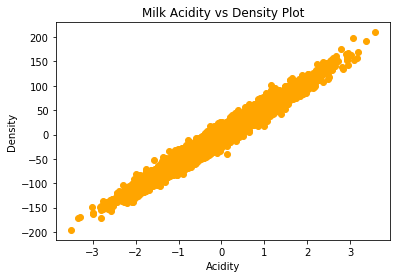

In [3]:
# Normalisation 
#plt.scatter(x,y)
x = (x - x.mean())/x.std()
plt.scatter(x,y,color='orange')
plt.xlabel("Acidity")
plt.ylabel("Density")
plt.title("Milk Acidity vs Density Plot")
plt.show()

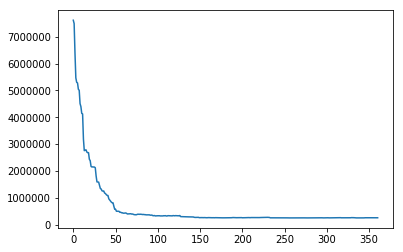

In [6]:
# Linear Regression 
def hypothesis(x,theta):
    return theta[0] + x*theta[1]

def error(X,Y,theta):
    m = Y.shape[0]
    total_e = 0
    
    for i in range(m):
        h = hypothesis(X[i],theta)
        e = (Y[i] - h)**2
        total_e += e
        
    return total_e/2



def batch_gradient(X,Y,theta,batch_size=1):
    
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h = hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i] - h)*X[i]
    
    return grad*0.5
        
    

def gradientDescent(X,Y,learning_rate=0.05):
    theta = np.zeros((2,))
    
    e = error(X,Y,theta)
    de =e
    error_list = [e]
    itr = 0
    
    while(itr<=400):
        grad = batch_gradient(X,Y,theta)
        theta = theta + learning_rate*grad
        ne = error(X,Y,theta)
        
        if(itr%10):
            error_list.append(ne)
        de = ne  - e
        e = ne
        itr += 1
    
    return error_list,theta


e,theta = gradientDescent(x,y)

plt.plot(e)
plt.show()

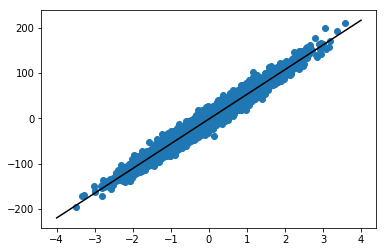

In [7]:
def drawLine(theta):
    x_pts = np.linspace(-4,4,10)
    y_pts = hypothesis(x_pts,theta)

    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')

drawLine(theta)